In [4]:
!pip install ifcopenshell

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import ifcopenshell
import ifcopenshell.geom
import ifcopenshell.util.selector
import networkx as nx


In [6]:
import ifcopenshell
import networkx as nx
import matplotlib.pyplot as plt

# Load the IFC file
model = ifcopenshell.open('D:\\IaaC\\RESEARCH\\TOPOLOGY.PY\\Topology\\ARK_NordicLCA_Office_Concrete_As-Built_Revit.ifc')

# Extract entities of specific types
walls = model.by_type("IfcWall")
floors = model.by_type("IfcSlab")
doors = model.by_type("IfcDoor")
zones = model.by_type("IfcSpace")

# Combine all filtered entities
filtered_entities = walls + floors + doors + zones

print(f"Number of walls: {len(walls)}")
print(f"Number of floors: {len(floors)}")
print(f"Number of doors: {len(doors)}")
print(f"Number of zones: {len(zones)}")


Number of walls: 607
Number of floors: 63
Number of doors: 269
Number of zones: 308


In [ ]:
G = nx.Graph()

# Add nodes and edges based on filtered entities
for entity in filtered_entities:
    G.add_node(entity.GlobalId, label=entity.is_a())

    if entity.is_a("IfcRelSpaceBoundary"):
        for rel in entity.RelatedBuildingElement:
            G.add_edge(entity.GlobalId, rel.GlobalId)

# For walls, floors, doors, and zones, we might not have direct relations
# Add edges manually if you have other relationships to connect


AttributeError: entity instance of type 'IFC4.IfcCartesianPoint' has no attribute 'GlobalId'

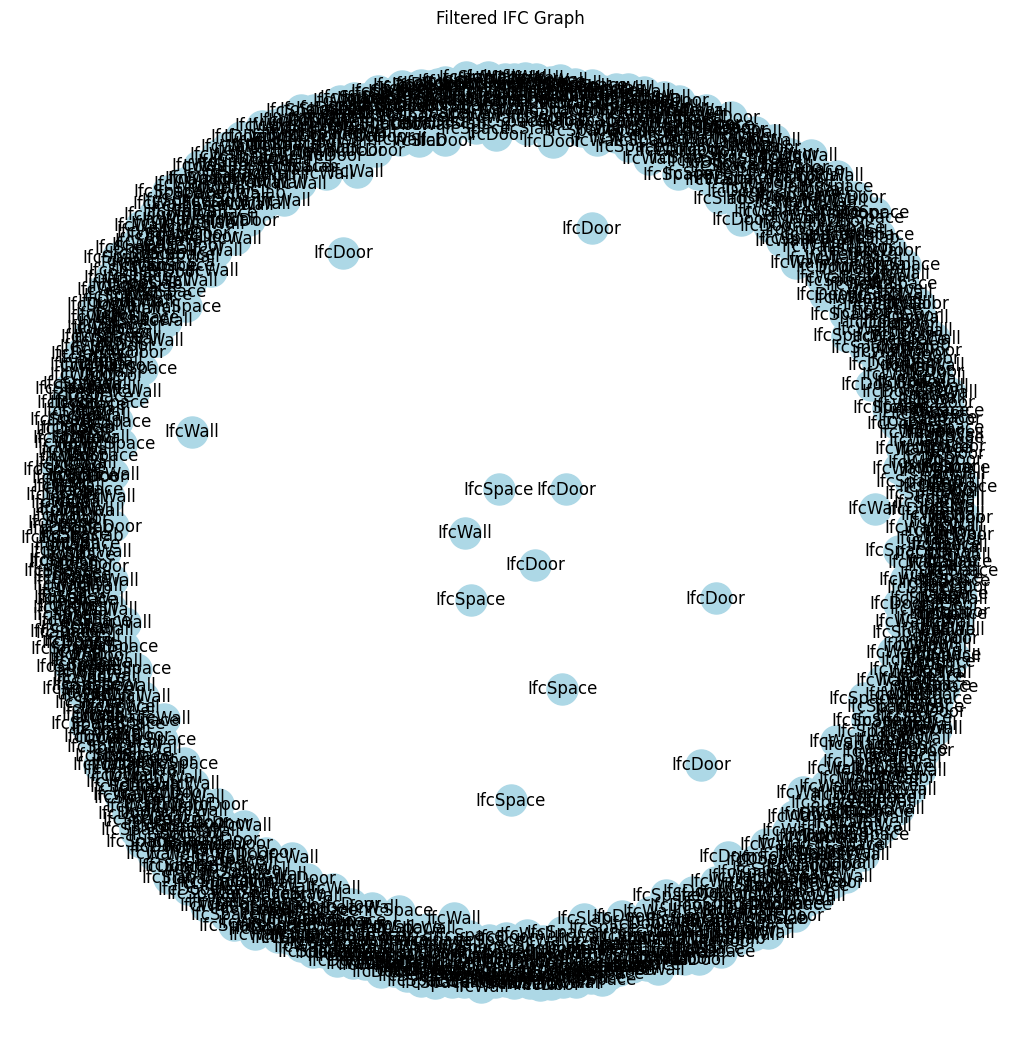

In [8]:
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=500, node_color='lightblue', edge_color='gray')
plt.title("Filtered IFC Graph")
plt.show()


In [ ]:
import networkx as nx
import ifcopenshell
import topologicpy.Graph as Graph
import topologicpy.Vertex as Vertex
import topologicpy.Edge as Edge

# Load the IFC file
ifc_file_path = 'D:\\IaaC\\RESEARCH\\TOPOLOGY.PY\\Topology\\ARK_NordicLCA_Office_Concrete_As-Built_Revit.ifc'  # Replace with your IFC file path
ifc_model = ifcopenshell.open(ifc_file_path)

# Define the element types to filter
element_types = {'zones': 'IfcSpace', 'walls': 'IfcWall', 'doors': 'IfcDoor'}

# Extract elements and create vertices
vertices = {}
for element_type, ifc_type in element_types.items():
    elements = ifc_model.by_type(ifc_type)
    for element in elements:
        guid = element.GlobalId  # Unique identifier
        name = element.Name if element.Name else f"{element_type}_{guid}"
        # Create a vertex for each element
        vertices[guid] = Vertex.Vertex.ByCoordinates(0, 0, 0, name=name)

# Create edges based on spatial relationships
edges = []
for element_type, ifc_type in element_types.items():
    elements = ifc_model.by_type(ifc_type)
    for element in elements:
        # Extract spatial containment relationships
        rels = getattr(element, "IsContainedInStructure", [])
        for rel in rels:
            if hasattr(rel, 'RelatingStructure') and rel.RelatingStructure:
                parent_guid = rel.RelatingStructure.GlobalId
                if parent_guid in vertices:
                    edge = Edge.Edge.ByVertices(vertices[element.GlobalId], vertices[parent_guid])
                    edges.append(edge)

# Create the topological graph
topo_graph = Graph.Graph.ByVerticesEdges(list(vertices.values()), edges)


# Convert TopologicPy graph to NetworkX graph
nx_graph = nx.Graph()

# Add vertices (nodes)
for guid, vertex in vertices.items():
    nx_graph.add_node(guid, label=vertex)

# Add edges
for edge in edges:
    start = edge.StartVertex().Name()
    end = edge.EndVertex().Name()
    nx_graph.add_edge(start, end)

# Export the NetworkX graph to GEXF
output_file = "D:\\IaaC\\RESEARCH\\TRAINING\\Topology Graph\\REFERENCE\\EXPORTexported_graph.gexf"
nx.write_gexf(nx_graph, output_file)
print(f"Graph exported successfully to {output_file}")


Graph exported successfully to D:\IaaC\RESEARCH\TRAINING\Topology Graph\REFERENCE\EXPORTexported_graph.gexf


In [ ]:
# Print the graph details
print("Topological Graph Created:")
print("Vertices:")
for v in topo_graph.vertices():
    print(v.Name())

print("\nEdges:")
for e in topo_graph.edges():
    print(f"{e.StartVertex().Name()} -> {e.EndVertex().Name()}")

# Visualization can be added using TopologicPy or exported to external tools

IFC TO GRAPH

In [ ]:
Vertex.Vertex.ByCoordinates

[]

In [64]:
import ifcopenshell
from topologicpy.Graph import Graph
from topologicpy.Vertex import Vertex
from topologicpy.Edge import Edge
import networkx as nx

ifc_file_path = 'D:\\IaaC\\RESEARCH\\TOPOLOGY.PY\\Topology\\ARK_NordicLCA_Office_Concrete_As-Built_Revit.ifc'

def ifc_to_topologic_graph(ifc_file_path):
    # Load the IFC file
    ifc_model = ifcopenshell.open(ifc_file_path)

    # Initialize lists for vertices and edges
    vertices = []
    edges = []

    # Extract spatial elements (e.g., IfcSpace) or objects from the IFC model
    spaces = ifc_model.by_type("IfcSpace")
    
    # Create a vertex for each space
    for space in spaces:
        if space.Name:
            vertex = Vertex.ByCoordinates(
                x=0,  # Replace with the space's actual geometry if available
                y=0,
                z=0,
                label=space.Name
            )
            vertices.append(vertex)

    # Example: Create edges between adjacent spaces (customize based on your logic)
    for i in range(len(vertices) - 1):
        edge = Edge.ByVertices(vertices[i], vertices[i + 1])
        edges.append(edge)

    # Create a topologic graph from the vertices and edges
    graph = Graph.ByVerticesEdges(vertices, edges)

    return graph

def topologic_to_networkx(topologic_graph):
    # Create a NetworkX graph
    nx_graph = nx.Graph()

    # Add vertices as nodes
    for vertex in topologic_graph.Vertices(vertex):
        nx_graph.add_node(
            vertex.ID(),
            label=vertex.Label(),
            x=vertex.X(),
            y=vertex.Y(),
            z=vertex.Z()
        )

    # Add edges
    for edge in topologic_graph.Edges(edge):
        start_vertex = edge.StartVertex()
        end_vertex = edge.EndVertex()
        nx_graph.add_edge(start_vertex.ID(), end_vertex.ID())

    return nx_graph

def export_to_gexf(nx_graph, output_file):
    # Export the NetworkX graph to GEXF format
    nx.write_gexf(nx_graph, output_file)
    print(f"Graph exported to {output_file}")

# Example usage
if __name__ == "__main__":
    ifc_path = 'D:\\IaaC\\RESEARCH\\TOPOLOGY.PY\\Topology\\ARK_NordicLCA_Office_Concrete_As-Built_Revit.ifc'
    output_gexf_path = 'D:\\IaaC\\RESEARCH\\TOPOLOGY.PY\\Topology\\ARK_graph.gexf'

    # Convert IFC to Topologic graph
    topologic_graph = ifc_to_topologic_graph(ifc_path)

    # Convert Topologic graph to NetworkX graph
    nx_graph = topologic_to_networkx(topologic_graph)

    # Export to GEXF
    export_to_gexf(nx_graph, output_gexf_path)



Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vertex.ByCoordinates - Error: Input parameters are greater than 3. Returning None.
Vert

UnboundLocalError: cannot access local variable 'vertex' where it is not associated with a value